In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
  #Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
  #Parse the JSON weather data for the following:
  #City, country, and date
 #Latitude and longitude
 #Maximum temperature
 #Humidity
 #Cloudiness
 #Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(f"Processing Record %s of set %s | %s" % (record_count,set_count,city))
       
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | punta arenas
Processing Record 2 of set 1 | saint-leu
Processing Record 3 of set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of set 1 | bredasdorp
Processing Record 5 of set 1 | lakes entrance
Processing Record 6 of set 1 | luzhou
Processing Record 7 of set 1 | golyshmanovo
Processing Record 8 of set 1 | codrington
Processing Record 9 of set 1 | mataura
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | tiksi
Processing Record 12 of set 1 | mar del plata
Processing Record 13 of set 1 | alice springs
Processing Record 14 of set 1 | monte alegre
Processing Record 15 of set 1 | buala
Processing Record 16 of set 1 | rikitea
Processing Record 17 of set 1 | butaritari
Processing Record 18 of set 1 | saint-philippe
Processing Record 19 of set 1 | hermanus
Processing Record 20 of set 1 | hobart
Processing Record 21 of set 1 | dikson
Processing Record 22 of set 1 | b

Processing Record 43 of set 4 | ballina
Processing Record 44 of set 4 | easley
Processing Record 45 of set 4 | conceicao do araguaia
Processing Record 46 of set 4 | clyde river
Processing Record 47 of set 4 | scarborough
Processing Record 48 of set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of set 4 | namatanai
Processing Record 50 of set 4 | puerto escondido
Processing Record 1 of set 5 | hualmay
Processing Record 2 of set 5 | twentynine palms
Processing Record 3 of set 5 | svetlogorsk
Processing Record 4 of set 5 | prince george
Processing Record 5 of set 5 | poum
Processing Record 6 of set 5 | lompoc
Processing Record 7 of set 5 | saint george
Processing Record 8 of set 5 | san mateo del mar
Processing Record 9 of set 5 | skjervoy
Processing Record 10 of set 5 | san cristobal
Processing Record 11 of set 5 | badin
Processing Record 12 of set 5 | axim
Processing Record 13 of set 5 | grand river south east
City not found. Skipping...
Processing Record 14 of set 

Processing Record 29 of set 8 | pierre
Processing Record 30 of set 8 | moose factory
Processing Record 31 of set 8 | labutta
City not found. Skipping...
Processing Record 32 of set 8 | marawi
Processing Record 33 of set 8 | zhezkazgan
Processing Record 34 of set 8 | vikindu
Processing Record 35 of set 8 | acarau
Processing Record 36 of set 8 | beyneu
Processing Record 37 of set 8 | antofagasta
Processing Record 38 of set 8 | barawe
City not found. Skipping...
Processing Record 39 of set 8 | arlit
Processing Record 40 of set 8 | palmer
Processing Record 41 of set 8 | santa cruz balanya
Processing Record 42 of set 8 | mitu
Processing Record 43 of set 8 | aksu
Processing Record 44 of set 8 | srednekolymsk
Processing Record 45 of set 8 | waipawa
Processing Record 46 of set 8 | wamba
Processing Record 47 of set 8 | chacabuco
Processing Record 48 of set 8 | chokurdakh
Processing Record 49 of set 8 | ilhabela
Processing Record 50 of set 8 | van
Processing Record 1 of set 9 | kilindoni
Process

Processing Record 15 of set 12 | ribeira grande
Processing Record 16 of set 12 | umm lajj
Processing Record 17 of set 12 | lavrentiya
Processing Record 18 of set 12 | maniitsoq
Processing Record 19 of set 12 | bati
Processing Record 20 of set 12 | rio branco
Processing Record 21 of set 12 | iberia
Processing Record 22 of set 12 | mont-de-marsan
Processing Record 23 of set 12 | tingrela
City not found. Skipping...
Processing Record 24 of set 12 | lagoa
Processing Record 25 of set 12 | avera
Processing Record 26 of set 12 | kikwit
Processing Record 27 of set 12 | fez
Processing Record 28 of set 12 | pontianak
Processing Record 29 of set 12 | samdrup jongkhar
Processing Record 30 of set 12 | tessalit
Processing Record 31 of set 12 | norilsk
Processing Record 32 of set 12 | kichera
Processing Record 33 of set 12 | lensk
Processing Record 34 of set 12 | pundaguitan
Processing Record 35 of set 12 | mazatan
Processing Record 36 of set 12 | baykit
Processing Record 37 of set 12 | yining
Proces

In [9]:
len(city_data)

571

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,60.80,59,90,12.66,CL,2021-01-16 19:02:13
1,saint-leu,-21.1500,55.2833,82.40,78,75,4.61,RE,2021-01-16 19:03:26
2,bredasdorp,-34.5322,20.0403,69.80,64,0,12.66,ZA,2021-01-16 19:03:26
3,lakes entrance,-37.8811,147.9810,55.99,74,41,1.99,AU,2021-01-16 19:03:26
4,luzhou,28.8724,105.4405,41.63,89,100,11.61,CN,2021-01-16 19:03:26
5,golyshmanovo,56.3979,68.3728,17.71,96,100,13.60,RU,2021-01-16 19:03:26
6,codrington,-38.2667,141.9667,55.40,70,99,9.73,AU,2021-01-16 19:03:26
7,mataura,-46.1927,168.8643,63.00,73,100,10.00,NZ,2021-01-16 19:03:27
8,ushuaia,-54.8000,-68.3000,59.00,58,75,17.27,AR,2021-01-16 19:03:03
9,tiksi,71.6872,128.8694,-13.14,90,100,12.84,RU,2021-01-16 19:03:27


In [11]:
#reorder columns, new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
#assign new column order to DataFrame:df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,2021-01-16 19:02:13,-53.1500,-70.9167,60.80,59,90,12.66
1,saint-leu,RE,2021-01-16 19:03:26,-21.1500,55.2833,82.40,78,75,4.61
2,bredasdorp,ZA,2021-01-16 19:03:26,-34.5322,20.0403,69.80,64,0,12.66
3,lakes entrance,AU,2021-01-16 19:03:26,-37.8811,147.9810,55.99,74,41,1.99
4,luzhou,CN,2021-01-16 19:03:26,28.8724,105.4405,41.63,89,100,11.61
5,golyshmanovo,RU,2021-01-16 19:03:26,56.3979,68.3728,17.71,96,100,13.60
6,codrington,AU,2021-01-16 19:03:26,-38.2667,141.9667,55.40,70,99,9.73
7,mataura,NZ,2021-01-16 19:03:27,-46.1927,168.8643,63.00,73,100,10.00
8,ushuaia,AR,2021-01-16 19:03:03,-54.8000,-68.3000,59.00,58,75,17.27
9,tiksi,RU,2021-01-16 19:03:27,71.6872,128.8694,-13.14,90,100,12.84


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

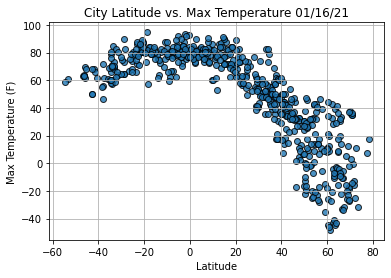

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

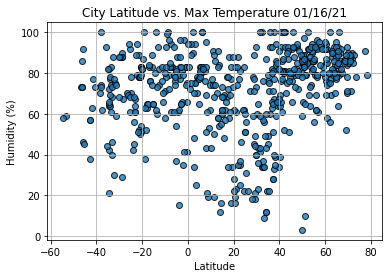

In [16]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

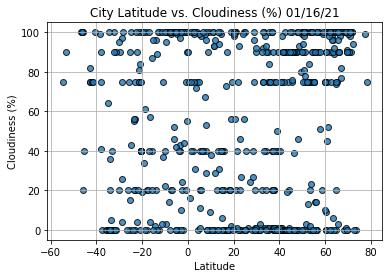

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

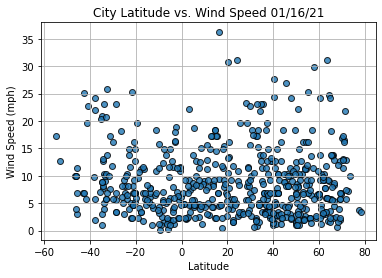

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

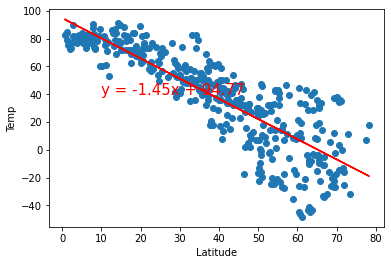

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [ ]:
print(f"The r_value is:{r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
plot_linear_regression

<function __main__.plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)>

In [23]:
index13 = city_data_df.loc[13]
index13

City                        buala
Country                        SB
Date          2021-01-16 19:03:27
Lat                        -8.145
Lng                       159.592
Max Temp                    80.33
Humidity                       79
Cloudiness                    100
Wind Speed                   7.05
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
566     True
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,luzhou,CN,2021-01-16 19:03:26,28.8724,105.4405,41.63,89,100,11.61
5,golyshmanovo,RU,2021-01-16 19:03:26,56.3979,68.3728,17.71,96,100,13.60
9,tiksi,RU,2021-01-16 19:03:27,71.6872,128.8694,-13.14,90,100,12.84
15,butaritari,KI,2021-01-16 19:03:27,3.0707,172.7902,80.87,75,31,22.26
19,dikson,RU,2021-01-16 19:03:06,73.5069,80.5464,-31.54,78,0,10.04


In [26]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

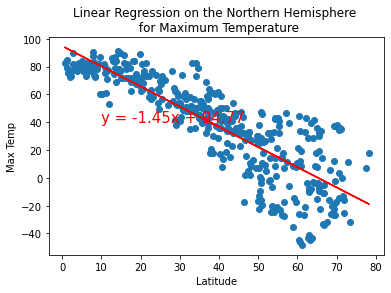

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

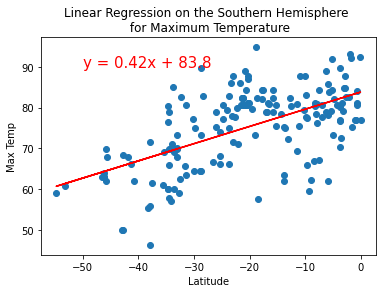

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

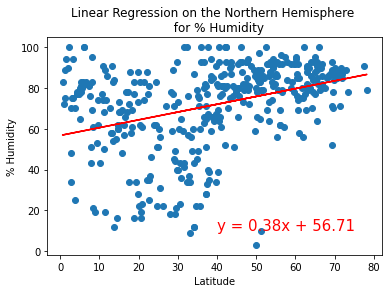

In [30]:
#linear regression on the Precent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for % Humidity', 
                       '% Humidity',(40,10))

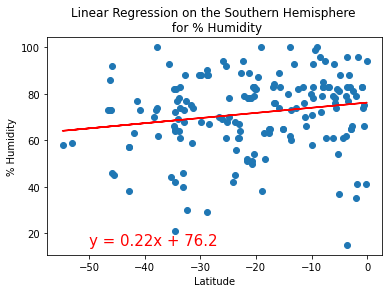

In [31]:
#linear regression on the Precent Humidity for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

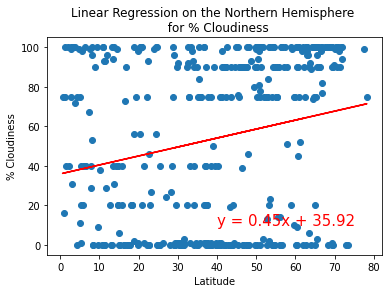

In [32]:
#Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for % Cloudiness', 
                       '% Cloudiness',(40,10))

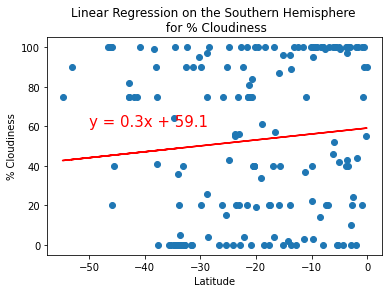

In [33]:
#Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

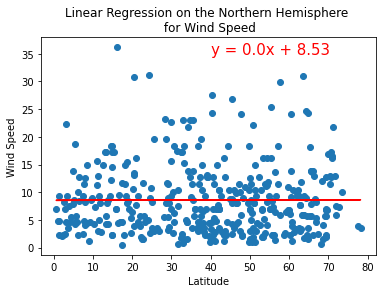

In [34]:
#Perform Linear Regression on the Wind Speed linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

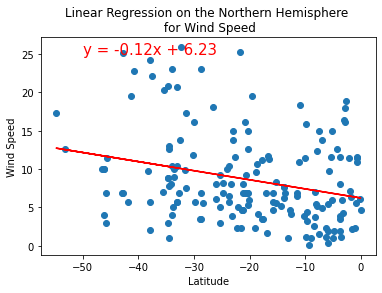

In [43]:
#Perform Linear Regression on the Wind Speed for the Southern Hemisphere
#Perform Linear Regression on the Wind Speed linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))